In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.ticker import FuncFormatter
import numpy as np


In [2]:
def replace_nan(time_series: np.array, k: int = 7):
    """
        Заменяет значения NaN во временном ряде значениями из окружающих точек в заданном окне.

        :param time_series: numpy.array
            Одномерный массив, представляющий временной ряд данных.
        :param k: int, optional
            Половина размера окна вокруг каждого значения NaN, где используются окружающие значения для замены. По умолчанию равно 7.

        :return: numpy.array
            Копия входного временного ряда с замененными значениями NaN на окружающие значения в указанном окне.
    """
    copy_ts = time_series.copy()
    for i, value in enumerate(time_series):
        if np.isnan(value):
            copy_ts[i - k: i + k] = np.nan
    return copy_ts


In [3]:
df = pd.read_csv('../data/рознично-торговый оборот.csv')
market_name = df[df.columns[0]].values

df_0_15 = df[df.columns[:15]]
df = df[df.columns[15:]]
dates = pd.to_datetime(df.columns, format='%d.%m.%Y')

In [4]:
df__cut = df.copy()
k = 7
for index, row in tqdm(df__cut.iterrows()):
    df__cut.loc[index] = replace_nan(row, k = k)

1586it [00:04, 319.44it/s]


Можно отобразить обрезку данных, выделив цветом

<Figure size 1300x300 with 0 Axes>

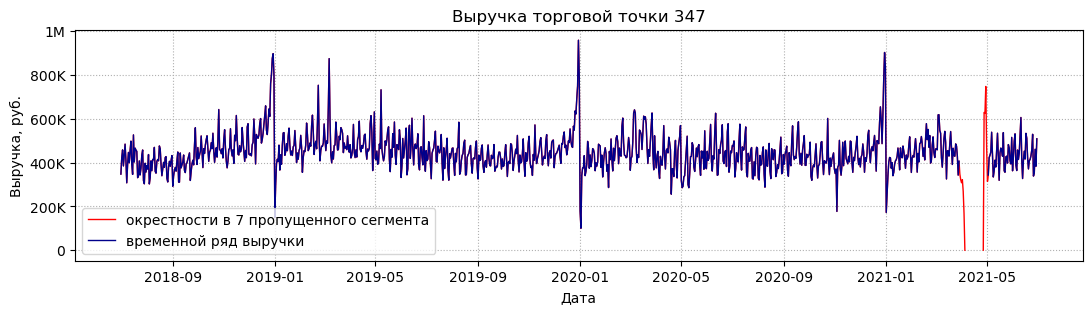

In [5]:
i = 0

plt.figure(figsize=(13,3))

def custom_formatter(x, pos):
    """
    Функция для форматирования меток на шкале y в тысячах и миллионах.__

    Parameters:
    - x (float): Значение на оси y, которое нужно отформатировать.
    - pos (int): Позиция метки на оси.

    Returns:
    - str: Отформатированная строка для отображения на шкале y.
    """
    if x >= 1e6:
        return f'{x / 1e6:.0f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.0f}K'
    elif x < 1e3:
        return f'{x :.0f}'


plt.figure(figsize=(13, 3))
# Пунктирная сетка фона
plt.grid(linestyle='dotted')

plt.plot(dates,df.values[i],linewidth =1, color = 'red', label = f'окрестности в {k} пропущенного сегмента')
plt.plot(dates,df__cut.values[i],linewidth =1, color = 'darkblue', label = 'временной ряд выручки')
# Настройка шкалы y
formatter = FuncFormatter(custom_formatter)
plt.gca().yaxis.set_major_formatter(formatter)


# Добавление заголовков и меток осей
plt.title(f'Выручка торговой точки {market_name[i]}')
plt.xlabel('Дата')
plt.ylabel('Выручка, руб.')
plt.legend(loc='best')


plt.show()

In [8]:
merged_df = pd.concat([df_0_15, df__cut], axis=1)
merged_df.head()

,№ магазина,Кол-во сотрудников,Кол-во кассиров,"Регион, область",Населенный пункт,Адрес,"Площадь торгового зала, м2",Ночная приемка,Ночная выкладка,Кол-во касс,...,21.06.2021,22.06.2021,23.06.2021,24.06.2021,25.06.2021,26.06.2021,27.06.2021,28.06.2021,29.06.2021,30.06.2021
0,347,19,14,Ленинградская область,Кириши,"ЛО, г. Кириши, пр. Героев, д. 11, лит.А, А1",718.0,да,да,6.0,...,408915.90,414673.64,431250.19,459223.56,529554.21,338798.05,354198.10,461161.56,383900.10,509057.20
1,373,14,8,Ленинградская область,Волхов,"ЛО, г. Волхов, ул. Фрунзе, д. 7, лит. А, А1",599.0,нет,нет,4.0,...,492553.11,516853.31,498774.35,545307.36,654159.65,550324.94,513243.35,533213.13,495307.80,542927.19
2,388,22,9,Ленинградская область,Тихвин,"ЛО, г. Тихвин, 2-й микрорайон, Коммунальный кв...",587.1,да,да,5.0,...,816734.41,836814.73,889470.34,865805.67,1121717.65,835502.51,626233.08,871419.48,890760.88,826717.20
3,390,13,17,Ленинградская область,Волхов,"ЛО, г. Волхов, Волховский пр., д. 57",438.0,нет,нет,3.0,...,444639.37,461633.93,424222.71,475045.91,631693.87,552230.82,359389.72,426326.52,388134.89,421284.93
4,397,23,9,Ленинградская область,Тихвин,"ЛО, Тихвин, 5-й микрорайон, дом 51а",385.6,да,да,5.0,...,566849.12,558557.85,493720.48,549694.79,593511.08,462551.61,471669.47,505690.18,526306.06,535214.49


In [7]:
merged_df.to_csv('../data/рознично-торговый оборот__окрестности.csv', index = False)